In [4]:
import sys
sys.path.append('../')
import pystan
import stan_utility
import pandas as pd
import seaborn as sns

import arviz as az
import numpy as np
import scipy.stats as stats
from scipy.stats import kde

In [5]:
import matplotlib.pyplot as plt
import matplotlib as mpl

light="#FFFCDC"
light_highlight="#FEF590"
mid="#FDED2A"
mid_highlight="#f0dc05"
dark="#EECA02"
dark_highlight="#BB9700"
green="#00FF00"
light_grey="#DDDDDD"

plt.style.context('seaborn-white')
mpl.rcParams['figure.dpi']= 200

In [6]:
with open('gamma.stan', 'r') as file:
    print(file.read())

data {
  real alpha;
  real beta;
}


generated quantities {
    real gamma = gamma_rng(alpha,beta);
    real inv_gamma = inv_gamma_rng(alpha,beta);
}


In [7]:
model=stan_utility.compile_model('gamma.stan')

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_e2bba17566b20313406615f2c24c15a5 NOW.


In [8]:
R=1000
sim_nm=model.sampling(data={'alpha':3, 'beta':2},
                      algorithm="Fixed_param", 
                      iter=R, 
                      warmup=0, 
                      chains=1,
                      seed=29042020)

In [9]:
params=sim_nm.extract()
gamma=params['gamma']
inv_gamma=params['inv_gamma']

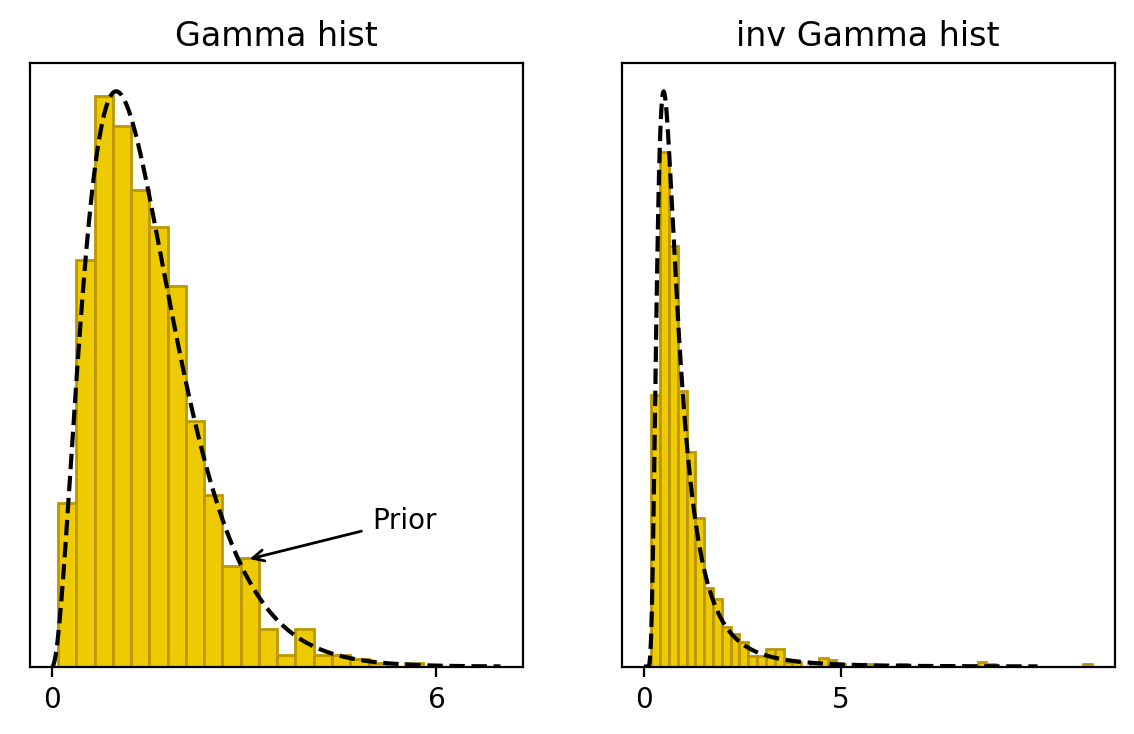

In [10]:
fig, axes = plt.subplots(1, 2, figsize=(7, 4))
ax1=axes[0]
ax1.hist(gamma,bins=20,color=dark,edgecolor=dark_highlight,density=True)
x=np.linspace(0,7,500)
alpha = 3
beta = 2
ax1.plot(x,stats.gamma.pdf(x,a=alpha,scale=1/beta),color='black',linestyle='--')
ax1.set_xticks([0,6])
ax1.set_yticks([])
ax1.set_title(r'Gamma hist')
ax1.annotate('Prior',xy=(3,0.1),xytext=(5,0.13),arrowprops={'arrowstyle':'->'})

ax2=axes[1]
ax2.hist(inv_gamma,bins=50,color=dark,edgecolor=dark_highlight,density=True)
x2=np.linspace(0,10,500)
ax2.plot(x2,stats.invgamma.pdf(x2,a=alpha,scale=beta),color='black',linestyle='--')
ax2.set_yticks([])
ax2.set_xticks([0,5])
ax2.set_title('inv Gamma hist')
plt.show()

In [19]:
model=stan_utility.compile_model('gamma_98.stan')

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_c29de3c48cb33c817346508b7d6e2bbd NOW.


In [20]:
R=1000
sim_nm=model.sampling(data={'y_guess':[6, 0.8, 0.01], 'theta':[5,10]},
                      algorithm="Fixed_param", 
                      iter=R, 
                      warmup=0, 
                      chains=1,
                      seed=29042020)

In [21]:
params2=sim_nm.extract()
gamma=params2['gamma']
inv_gamma=params2['inv_gamma']

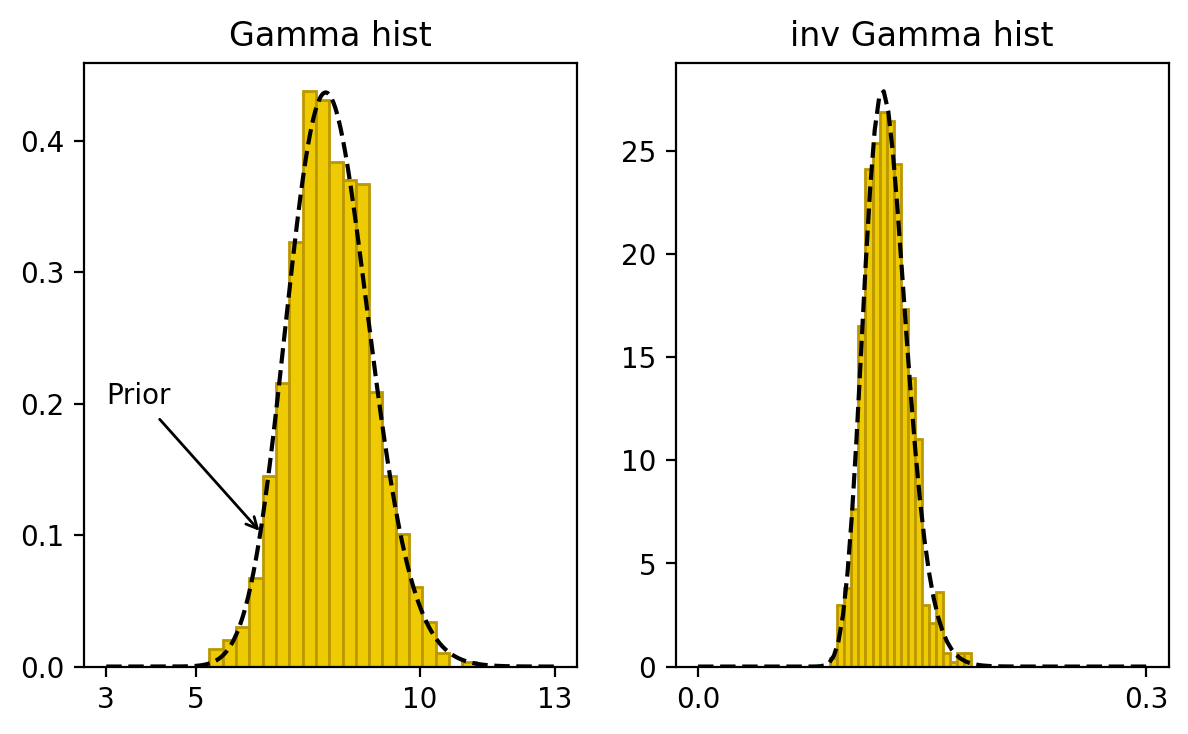

In [22]:
fig, axes = plt.subplots(1, 2, figsize=(7, 4))
ax1=axes[0]
ax1.hist(gamma,bins=20,color=dark,edgecolor=dark_highlight,density=True)
x=np.linspace(3,13,500)
alpha = 75.8152
beta = 9.4769
ax1.plot(x,stats.gamma.pdf(x,a=alpha,scale=1/beta),color='black',linestyle='--')
ax1.set_xticks([3,5,10,13])
#ax1.set_yticks([])
ax1.set_title(r'Gamma hist')
ax1.annotate('Prior',xy=(6.5,0.1),xytext=(3,0.2),arrowprops={'arrowstyle':'->'})

ax2=axes[1]
ax2.hist(inv_gamma,bins=20,color=dark,edgecolor=dark_highlight,density=True)
x2=np.linspace(0,0.3,100)
ax2.plot(x2,stats.invgamma.pdf(x2,a=alpha,scale=beta),color='black',linestyle='--')
#ax2.set_yticks([])
ax2.set_xticks([0,0.3])
ax2.set_title('inv Gamma hist')
plt.show()

In [111]:
with open('binomial.stan', 'r') as file:
    print(file.read())

data {
  real alpha;
  real meann;
  real phi;
}

generated quantities {  
    real neg_bin_con = neg_binomial_rng(alpha, alpha/meann);
    real neg_bin_dis = neg_binomial_2_rng(meann, phi);
    real poisson_con = poisson_rng(neg_bin_con);
    real poisson_dis = poisson_rng(neg_bin_dis); 
}


In [112]:
model=stan_utility.compile_model('binomial.stan')

Using cached StanModel


In [113]:
alpha = 4
mean = 20
beta = alpha/mean

mu = mean
phi = 9

R=1000
sim_uf=model.sampling(data={'alpha':alpha, 'meann':mu,'phi':phi},
                                    algorithm="Fixed_param", 
                                    iter=R, 
                                    warmup=0, 
                                    chains=1, 
                                    refresh=R,
                                    seed=29042020)

In [114]:
params=sim_uf.extract()
neg_bin_con=params['neg_bin_con']
poisson_con=params['poisson_con']
neg_bin_dis=params['neg_bin_dis']
poisson_dis=params['poisson_dis']

In [115]:
x_con=np.linspace(0, 80, 81)
x_dis=np.linspace(0, 45, 46)
nbinom_fun_con = stats.nbinom(alpha, beta/(beta+1))
nbinom_fun_dis = stats.nbinom(phi, phi/(mu+phi))

nbinom_pmf_con = []
nbinom_pmf_dis = []

for i in range(0, len(x_con)):
    nbinom_pmf_con.append( nbinom_fun_con.pmf( x_con[i] ))
for i in range(0, len(x_dis)):
    nbinom_pmf_dis.append( nbinom_fun_dis.pmf( x_dis[i] ))

D:\Anaconda3\envs\DataAnalytics\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
D:\Anaconda3\envs\DataAnalytics\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
D:\Anaconda3\envs\DataAnalytics\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
D:\Anaconda3\envs\DataAnalytics\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


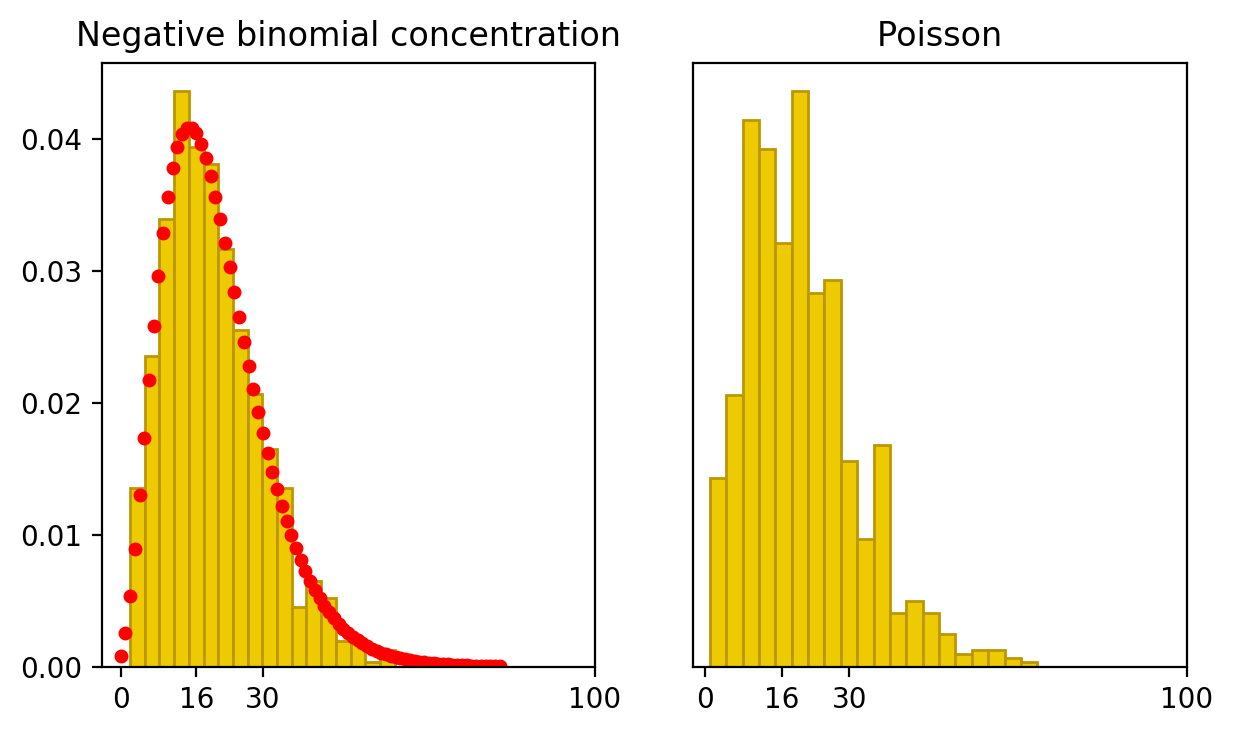

In [116]:
fig, axes = plt.subplots(1, 2, figsize=(7, 4))

ax1=axes[0]
ax1.hist(neg_bin_con,bins=20, color=dark, edgecolor=dark_highlight, density=True)
ax1.plot(x_con, nbinom_pmf_con,  'ro', markersize=4)
ax1.set_xticks([0,16,30,100])
#ax1.set_yticks([])
ax1.set_title(r'Negative binomial concentration')

ax2=axes[1]
ax2.hist(poisson_con,color=dark,edgecolor=dark_highlight,density=True,bins=20)
ax2.set_yticks([])
ax2.set_xticks([0,16,30,100])
ax2.set_title('Poisson')

plt.show()

D:\Anaconda3\envs\DataAnalytics\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
D:\Anaconda3\envs\DataAnalytics\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


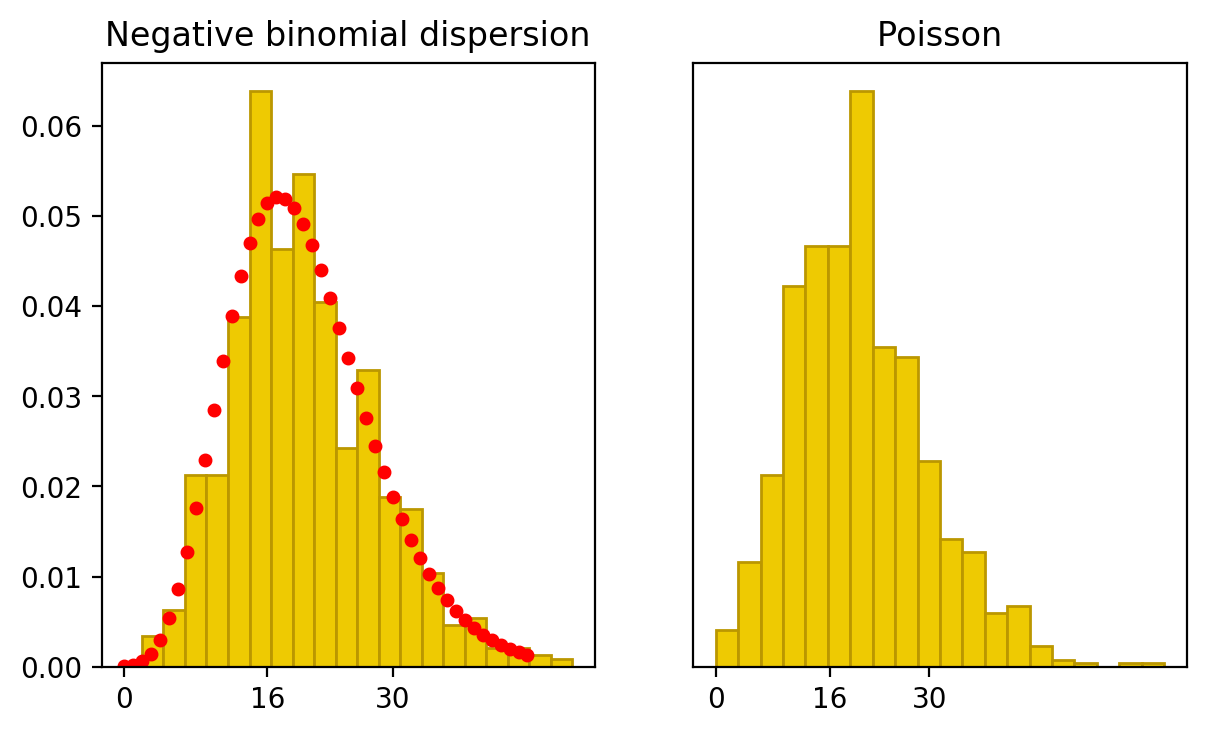

In [117]:
fig, axes = plt.subplots(1, 2, figsize=(7, 4))

ax1=axes[0]
ax1.hist(neg_bin_dis,color=dark,edgecolor=dark_highlight,density=True,bins=20)
ax1.plot(x_dis, nbinom_pmf_dis,  'ro', markersize=4)
ax1.set_xticks([0,16,30])
#ax1.set_yticks([])
ax1.set_title('Negative binomial dispersion')

ax2=axes[1]
ax2.hist(poisson_dis,color=dark,edgecolor=dark_highlight,density=True,bins=20)
ax2.set_yticks([])
ax2.set_xticks([0,16,30])
ax2.set_title('Poisson')

plt.show()

In [92]:
with open('student.stan', 'r') as file:
    print(file.read())

data {
  real degrees;
  real mu;
  real sigma;
}

generated quantities {
    real student = student_t_rng(degrees, mu,sigma);
}


In [93]:
model=stan_utility.compile_model('student.stan')

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_6364aac4146434de007022541703371f NOW.


In [107]:
degrees = 1
mu = 0
sigma = 2

In [108]:
R1=10
sim_nm1=model.sampling(data={'degrees':1, 'mu':0, 'sigma':2},
                      algorithm="Fixed_param", 
                      iter=R1, 
                      warmup=0, 
                      chains=1,
                      seed=29042020)
R2=50
sim_nm2=model.sampling(data={'degrees':1, 'mu':0, 'sigma':2},
                      algorithm="Fixed_param", 
                      iter=R2, 
                      warmup=0, 
                      chains=1,
                      seed=29042020)

In [109]:
params1=sim_nm1.extract()
student1=params1['student']
params2=sim_nm2.extract()
student2=params2['student']

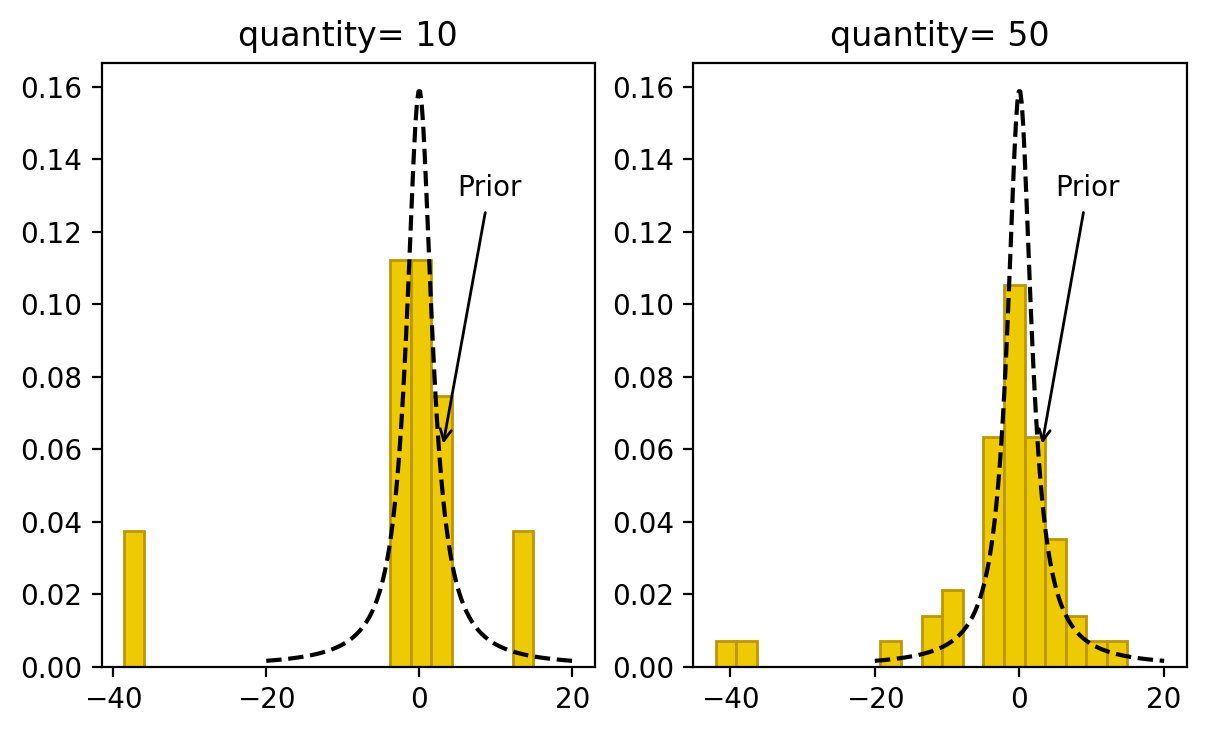

In [110]:
x=np.linspace(-20,20,200)

fig, axes = plt.subplots(1, 2, figsize=(7, 4))

ax1=axes[0]
ax1.hist(student1,bins=20,color=dark,edgecolor=dark_highlight,density=True)
ax1.plot(x,stats.t.pdf(x,df=1,loc=0,scale=2),color='black',linestyle='--')
ax1.annotate('Prior',xy=(3,0.06),xytext=(5,0.13),arrowprops={'arrowstyle':'->'})
ax1.set_title(r'quantity= 10')

ax2=axes[1]
ax2.hist(student2,bins=20,color=dark,edgecolor=dark_highlight,density=True)
ax2.plot(x,stats.t.pdf(x,df=1,loc=0,scale=2),color='black',linestyle='--')
ax2.annotate('Prior',xy=(3,0.06),xytext=(5,0.13),arrowprops={'arrowstyle':'->'})
ax2.set_title(r'quantity= 50')

plt.show()

In [99]:
degrees = 2
mu = 7
sigma = 3

In [100]:
R1=10
sim_nm1=model.sampling(data={'degrees':degrees, 'mu':mu, 'sigma':sigma},
                      algorithm="Fixed_param", 
                      iter=R1, 
                      warmup=0, 
                      chains=1,
                      seed=29042020)
R2=50
sim_nm2=model.sampling(data={'degrees':degrees, 'mu':mu, 'sigma':sigma},
                      algorithm="Fixed_param", 
                      iter=R2, 
                      warmup=0, 
                      chains=1,
                      seed=29042020)

In [101]:
params1=sim_nm1.extract()
student1=params1['student']
params2=sim_nm2.extract()
student2=params2['student']

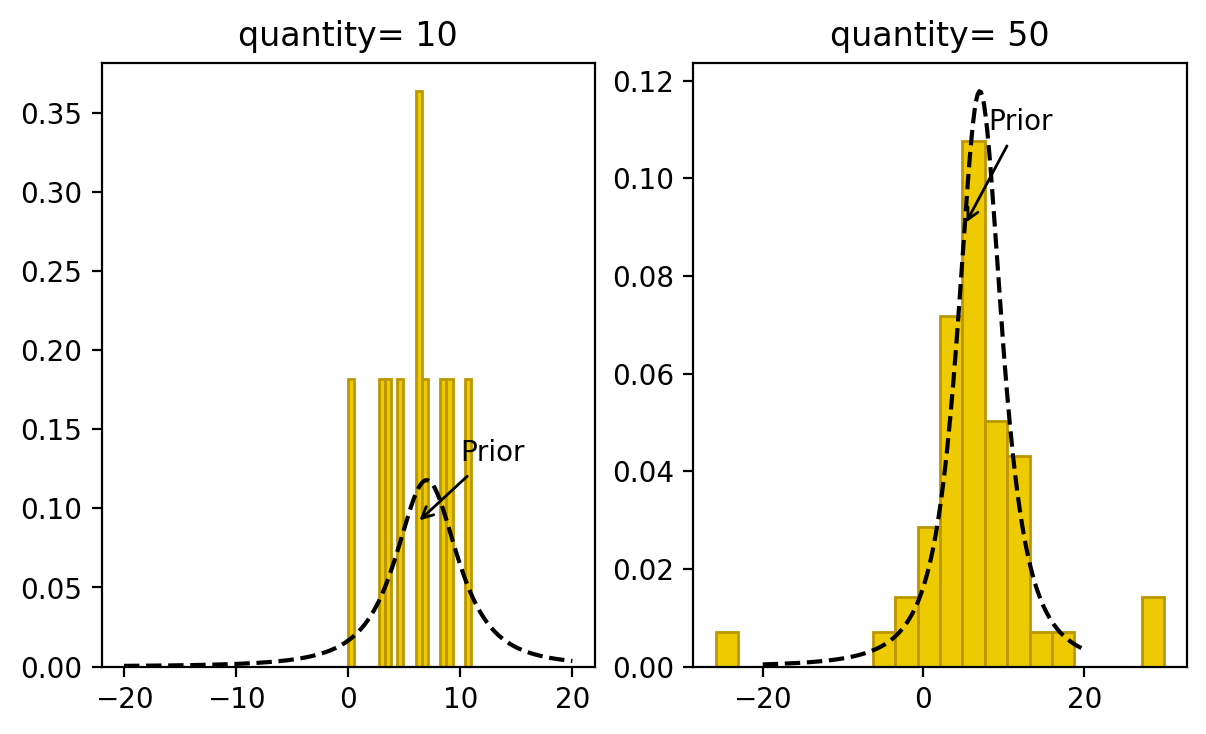

In [105]:
x=np.linspace(-20,20,200)

fig, axes = plt.subplots(1, 2, figsize=(7, 4))

ax1=axes[0]
ax1.hist(student1,bins=20,color=dark,edgecolor=dark_highlight,density=True)
ax1.plot(x,stats.t.pdf(x, df=degrees, loc=mu, scale=sigma),color='black',linestyle='--')
ax1.annotate('Prior',xy=(6,0.09),xytext=(10,0.13),arrowprops={'arrowstyle':'->'})
ax1.set_title(r'quantity= 10')
ax2=axes[1]
ax2.hist(student2,bins=20,color=dark,edgecolor=dark_highlight,density=True)
ax2.plot(x,stats.t.pdf(x, df=degrees, loc=mu, scale=sigma),color='black',linestyle='--')
ax2.annotate('Prior',xy=(5,0.09),xytext=(8,0.11),arrowprops={'arrowstyle':'->'})
ax2.set_title(r'quantity= 50')

plt.show()